Objective:


The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Deliverables:

Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.
Additional Information:

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.
Instructions:

Download the wine dataset from the UCI Machine Learning Repository
Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.

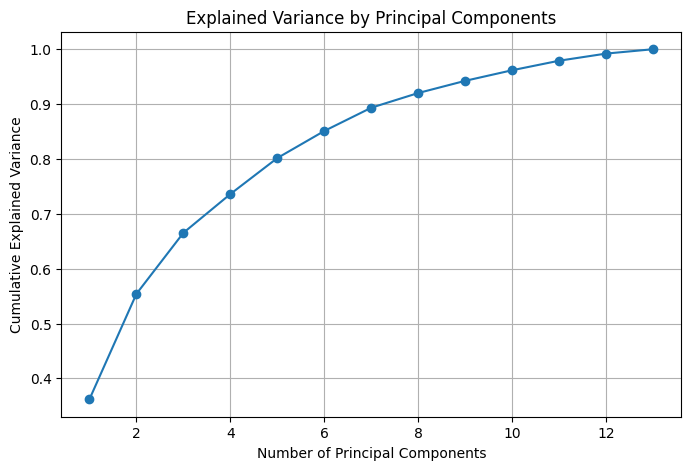

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


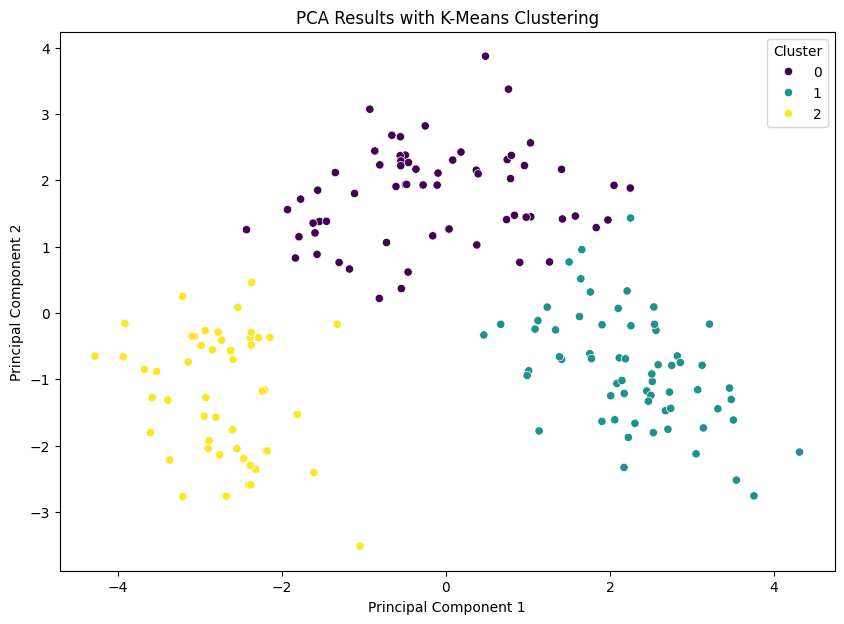

Silhouette Score: 0.56


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
                'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue',
                'OD280/OD315_of_diluted_wines', 'Proline']
data = pd.read_csv(url, header=None, names=column_names)

# Step 2: Data Preprocessing
features = data.drop('Class', axis=1)
target = data['Class']

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Implement PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Choosing the number of components (e.g., 2 for visualization)
pca = PCA(n_components=2)
pca_features_2d = pca.fit_transform(scaled_features)

# Step 4: Perform Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(pca_features_2d)

# Step 5: Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_features_2d[:, 0], y=pca_features_2d[:, 1], hue=clusters, palette='viridis', marker='o')
plt.title('PCA Results with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Performance Metrics
silhouette_avg = silhouette_score(pca_features_2d, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Save scatter plot and performance metrics
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_features_2d[:, 0], y=pca_features_2d[:, 1], hue=clusters, palette='viridis', marker='o')
plt.title('PCA Results with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.savefig('pca_kmeans_scatterplot.png')
plt.close()

# Save performance metrics
metrics_df = pd.DataFrame({'Metric': ['Silhouette Score'], 'Value': [silhouette_avg]})
metrics_df.to_csv('clustering_performance_metrics.csv', index=False)


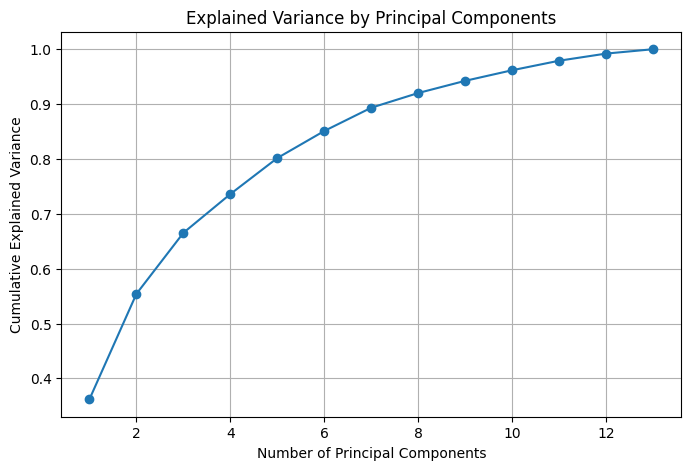

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


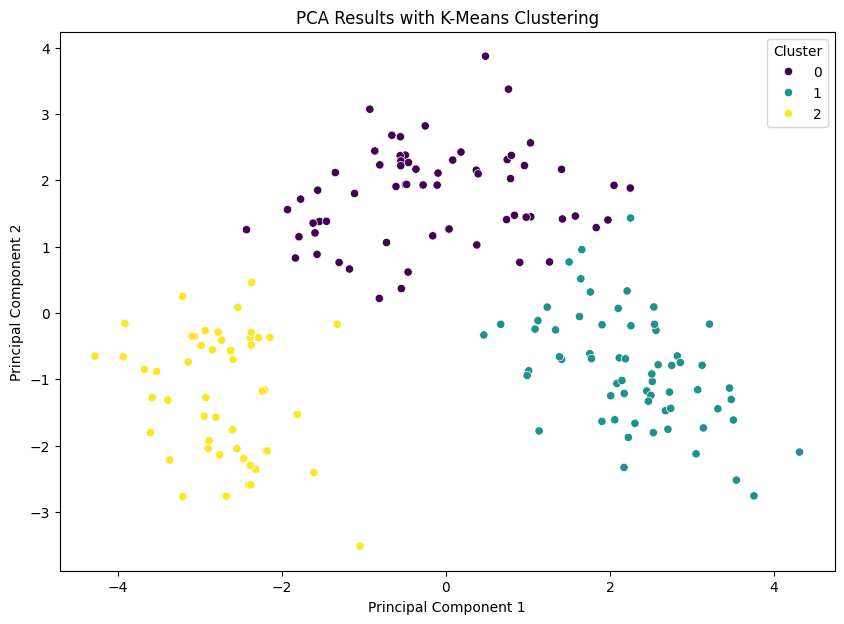

Silhouette Score: 0.56
             Metric     Value
0  Silhouette Score  0.561051


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
                'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue',
                'OD280/OD315_of_diluted_wines', 'Proline']
data = pd.read_csv(url, header=None, names=column_names)

# Step 2: Data Preprocessing
features = data.drop('Class', axis=1)
target = data['Class']

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Implement PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.savefig('explained_variance_plot.png')  # Save the plot
plt.show()

# Choosing the number of components (e.g., 2 for visualization)
pca = PCA(n_components=2)
pca_features_2d = pca.fit_transform(scaled_features)

# Step 4: Perform Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(pca_features_2d)

# Step 5: Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_features_2d[:, 0], y=pca_features_2d[:, 1], hue=clusters, palette='viridis', marker='o')
plt.title('PCA Results with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.savefig('pca_kmeans_scatterplot.png')  # Save the plot
plt.show()

# Step 6: Performance Metrics
silhouette_avg = silhouette_score(pca_features_2d, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Performance Metrics Table
metrics_df = pd.DataFrame({
    'Metric': ['Silhouette Score'],
    'Value': [silhouette_avg]
})

# Print the metrics table
print(metrics_df)

# Save performance metrics to a CSV file
metrics_df.to_csv('clustering_performance_metrics.csv', index=False)


Silhouette Score: 0.56
             Metric     Value
0  Silhouette Score  0.561051 **bold text**